<h1><center>NLP : Movie Critics</center></h1>
<h2><center>Part 1 : Preprocessing including 3 and 3.5 notes</center></h2>
<center><img src="https://simplonline.co/_next/image?url=https%3A%2F%2Fsimplonline-v3-prod.s3.eu-west-3.amazonaws.com%2Fmedia%2Fimage%2Fjpg%2F1dea9fa5-b2da-4731-925d-b2280a28af3e.jpg&w=1280&q=75" alt="iIllustration" title="title"  style="object-fit:cover; width:800px; height:250px;"/></center>

> __*Created by Charley lebarbier*__

## Objectives :  
*En règle générale, le nombre d'avis sur un film peu être important et par conséquent le temps de lecture de chaque commentaire peut être une tâche lourde. Alors comment déterminer de manière rapide si un film a eu du succès auprès des spectateurs (ou pas) ? Dans ce contexte, l’idée du projet est d’utiliser des algorithmes d'apprentissage automatique pour la tâche d'analyse de sentiment des spectateurs via leur critique.*  

*Tout d’abord, il sera question que récupérer les données directement du site d’Allociné. En d’autres termes, nous allons scraper les pages qui nous intéressent sur ce site à savoir les critiques des personnes pour le film Inception et Sonic 2.*  

*En navigant sur la page des critiques, vous vous apercevrez que seules deux types d’information ici nous intéresse : la note du spectateur ainsi que son avis. Pourquoi la note ? Parce que nous allons entraîner un modèle de type supervisé et plus précisément un classifieur et donc la note va nous aider à récupérer la classe pour étiqueter le commentaire. Pour cela, nous considérerons qu’une note au-dessus de 3 est considérée comme satisfaisante. Sinon, l’avis est négatif. Ici, nous avons donc réduit le problème à une classification binaire.*  

- Voici donc les étapes à réaliser :  
Récupération des données • Préparation des données. • Préparation du modèle et des jeux de données (entrainement & test) • Analyse des résultats*  
  
  
- __Etape 1 : Web Scraping des données d’avis de spectacteurs__
    - De l’avis du spectateur, nous ne devons « scraper » que deux zones la note et le commentaire.  
</br>
- __Etape 2 : Préparation des données__
    - Ayant maintenant nos jeux de données, il faut les préparer afin de pouvoir modéliser notre analyse de sentiments. Pour cela nous allons faire appel à plusieurs techniques :  
        - Des expressions régulières pour retirer les bruits (ponctuation, etc.) des commentaires.  
        - Du NLP pour tokeniser et réduire le corpus de chaque commentaire (afin par exemple de ne garder que les mots importants via les stopwords)*  
            - Des sacs de mots afin de « transformer » nos mots en nombres qui pourront alors être exploités dans un algorithme de Machine learning*  
            *Les commentaires sont maintenant filtrés à leur essentiel.*    
</br>
- __Etape 3 : Préparation des libellés__  
    - Jusque là, à chaque commentaire est associé une note de 1 à 5 et non une classe binaire. Il nous faut donc convertir nos notes en : 1 pour avis positif et 0 : pour avis négatif  
    - Note: N’oublions pas à la fin de retirer la note du jeu de données.  
</br>
- __Etape 4 : Finalisation de nos jeux de données__  
    - Les données sont presque prêtes mais nos commentaires qui sont maintenant sous forme de sac de mots doivent être convertis en nombre. Pour cela, il va falloir vectoriser nos mots (technique des sacs de mots) :  
        - Vous devriez avoir maintenant une belle matrice avec beaucoup de colonnes (qui correspond au nombre de mots du corpus)  
        - Afficher deux _WordCloud_: *le WordCloud des avis positifs et celui des avis négatifs.*  
</br>
- __Etape 5 : Entraînement du modèle__  
    - Nos données sont prêtes, nous allons pour ce premier exercice utiliser un algorithme de Regression Logistique comme ici il est question de classification binaire. Entraînons le modèle maintenant, et regardons sa précision par rapport au libellés connus.  
</br>
- __Etape 6 : Analyse des résultats__  
    - Calculer l’accuracy et la matrice de confusion sur les données de test. Une fois que les résultats sont satisfaisants, vous pourrez maintenant tester sur des commentaires que vous et vos collègues ferons afin de vérifier le bon fonctionnement du programme.  
</br>
- __Etape 7 : Réalisation d'une application WEB avec Flask qui lit un commentaire de Film et détermine s'il est positif ou pas__  
</br>
</br>
</br>
Pour Finir :
Option 1 : voir si en enlevant des commentaires des mots qui ressortent le plus dans le nuages de mots des données d'apprentissage (quelque soit le target)  
</br>
Option 2 : Générer des commentaires plus cours. s'aider du nuage de mots (avis positifs, avis négatifs).  
</br>
Option 3 : tester sur plusieurs modèles de classification

  
----  
----  


</br>
<center><h2>Web Scraping</h2></center>

Lancer le code dans 'modules' = allo_cine_scraping

</br>
<center><h2>Working Environment Preparation</h2></center>

In [1]:
# Import Libraries
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from tqdm import tqdm

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

%matplotlib inline

Our dataset includes 'viewer_reviews' on 5 films :
- Sonic 2 (average note : 3,2)
- Inception (average note : 4,5)
- Brocéliande (average note : 1,0)
- DragonBall Evolution (average note : 0,8)
- Avatar (average note : 4,3)

In [2]:
# Import Dataset
df = pd.read_csv('../data/viewers_critic_movies.csv')

In [ ]:
df.head()

In [ ]:
df.info()

</br>
<center><h2>Set Preparation</h2></center>

In [3]:
# First cleaning : delete the newline chars, the comments with only link
# and replace cells containing only whitespaces by NaN
df['Comment'] = df['Comment'].str.replace(r"\n", "")
df['Comment'] = df['Comment'].str.replace(r"http\S+", "")
df['Comment'] = df['Comment'].replace(['^\s*$'], np.nan, regex = True)

# Delete NaN Cells
df.dropna(subset=['Comment'], inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Check result
# with pd.option_context('display.max_rows', None):
#     print(df)

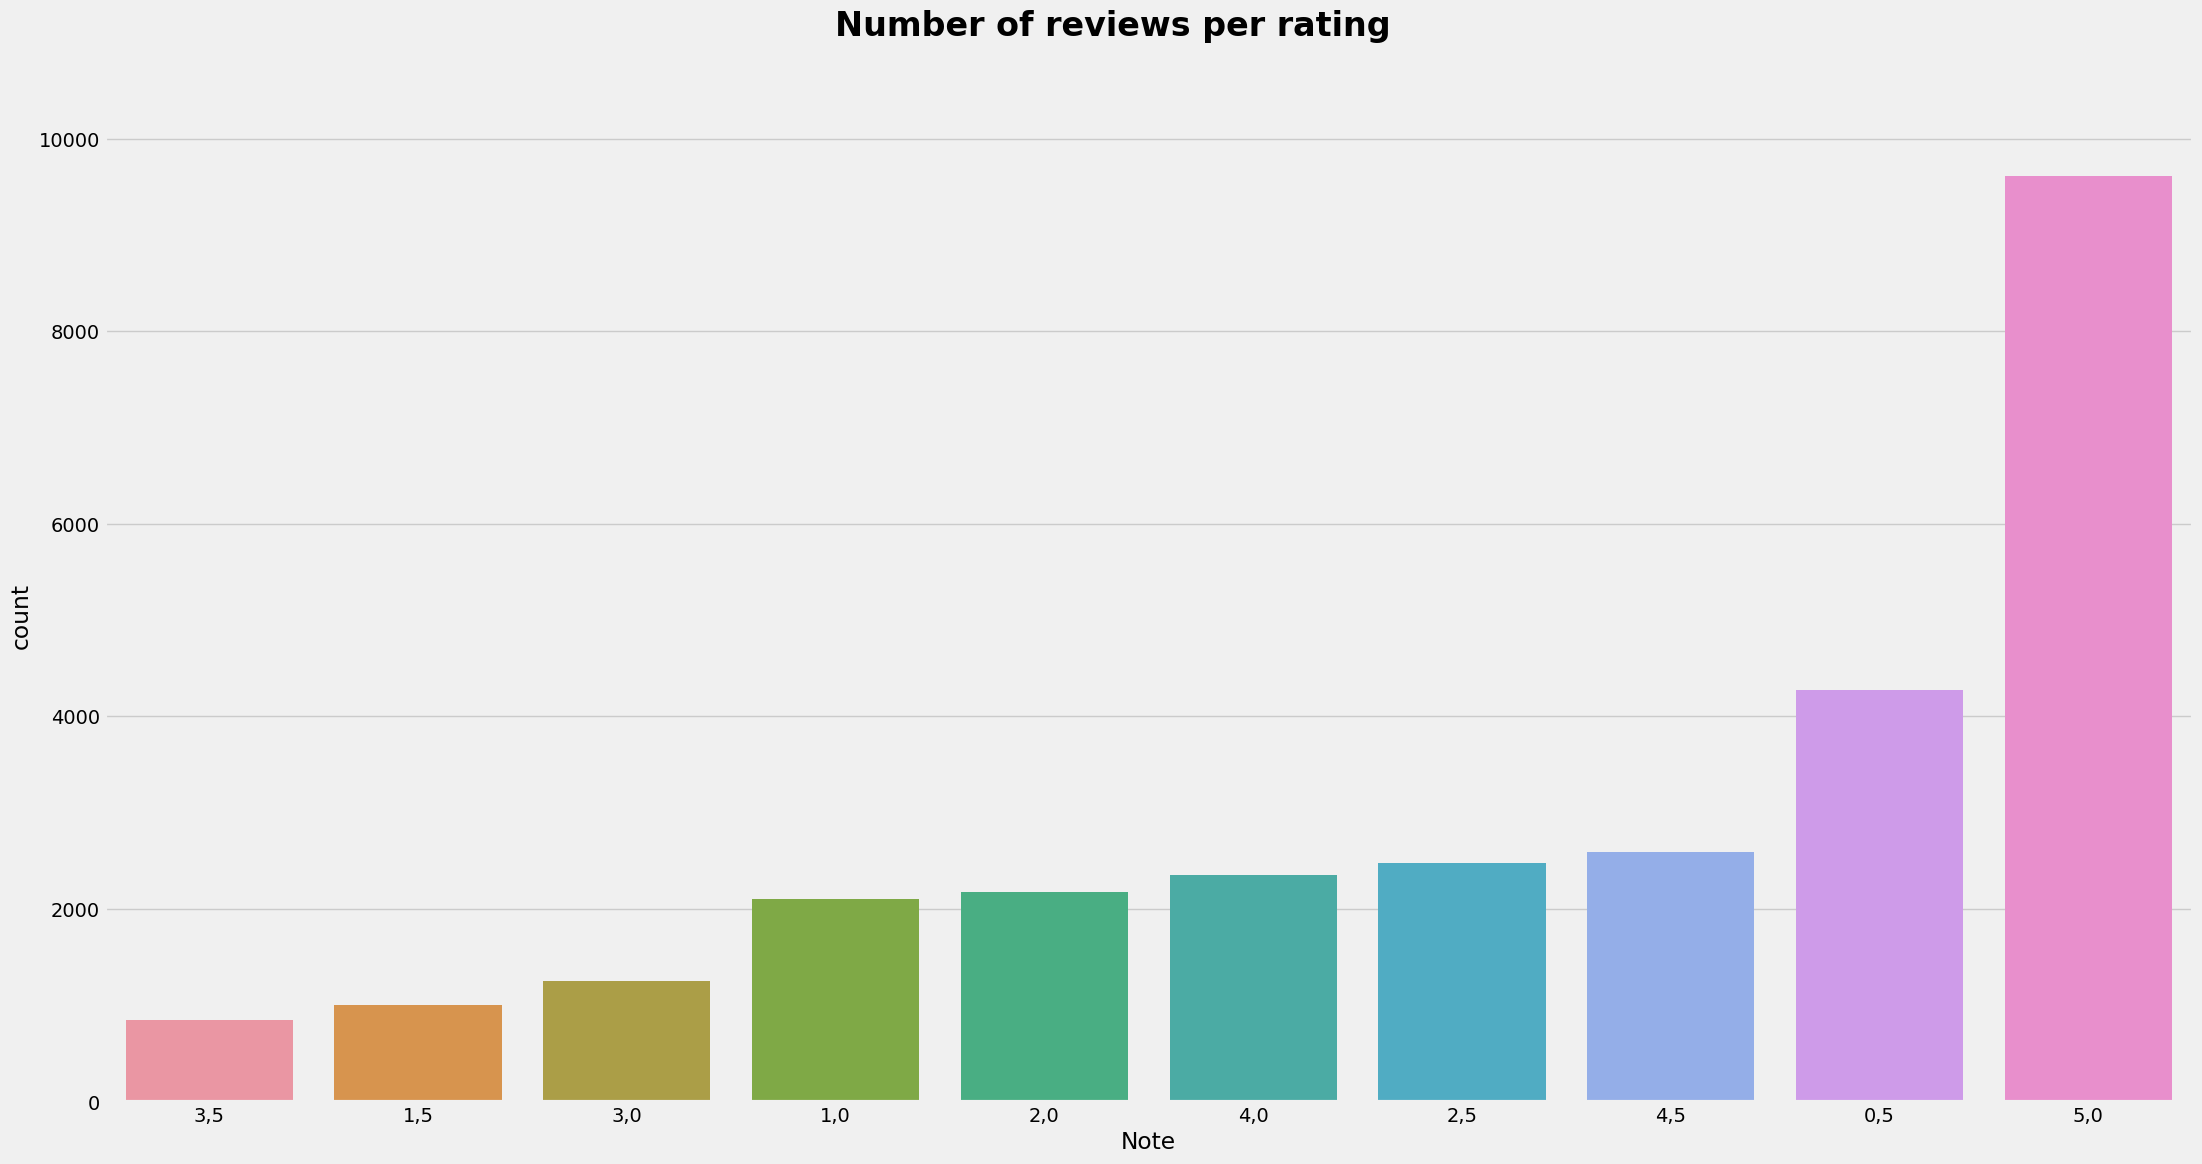

In [8]:
# Display the number of critics for each note
sns.countplot(data=df, x='Note', order=reversed(df['Note'].value_counts().index))

fig = plt.gcf()
fig.set_size_inches(24,12)
fig.suptitle("Number of reviews per rating", fontweight ="bold", fontsize=24)
plt.show()

#### Encoding the Target Column

In [5]:
# Encoding the target 'note' : >=3.5 - Positive ; <= 3 - Negative
def encodingTarget(target:str) -> None:
    """
    Encode the target 'note' on this pattern : : >=3 - Positive ; <3 - Negative
    @Params :
        target      - required : object (column 'output' in dataframe)
    """

    # Replace the comma to dot for conversion in float
    df[target] = df[target].str.replace(",", ".")

    # Convert the note - keep 3 ##
    for i in range(len(df[target])):
        if float(df['Note'][i]) >= 3.5:
            df['Note'][i] = 1
        else :
            df['Note'][i] = 0

encodingTarget('Note')

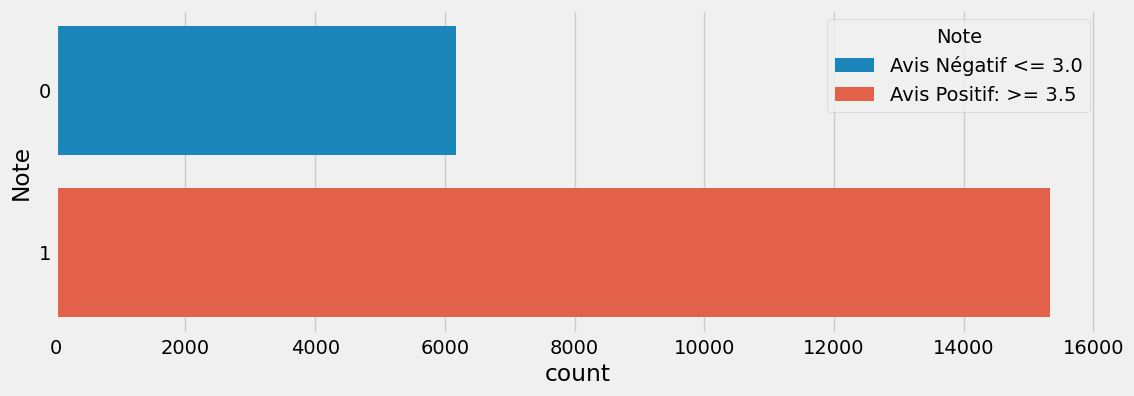

In [6]:
# Display the number of critics after encoding
ax = sns.countplot(data=df, y='Note', hue='Note', dodge=False)
fig = plt.gcf()
fig.set_size_inches(12,4)

h,l = ax.get_legend_handles_labels()
ax.legend(h, labels=["Avis Négatif <= 3.0", "Avis Positif: >= 3.5"], 
             title="Note", loc="upper right")

plt.show()

#### Create a new dataset with the same number of negative and positive reviews

*For the division, we will stay on 6000 comments of each category to constitute a new dataset of 12000 entries*

In [7]:
from sklearn.utils import shuffle

def df_equalizer(target, n_sample) -> pd.DataFrame:
    """
    Equals a dataframe with the same number of classes
    @Params:
        target          - required  : str (column where classes are)
        n_sample        - required  : int (number of sample for equalization)
    Example n_sample -> 6000 : for 2 classes, create a new_dataframe of 
    12000 sample (6000 / 6000)
    """

    # Create new dataframe with number of sample requested    
    new_df = df.groupby([target], group_keys=False).apply\
        (lambda grp: grp.sample(n=n_sample, random_state=42, replace=False))

    # Shuffle the new dataframe (need : from sklearn.utils import shuffle)
    new_df = shuffle(new_df, random_state=42)

    # reindex the new_df
    new_df.reset_index(drop=True, inplace=True)

    return new_df

new_df = df_equalizer('Note', 6_000)

# Check the parity after equalization
new_df['Note'].value_counts()

0    6000
1    6000
Name: Note, dtype: int64

In [10]:
# Display the result
# with pd.option_context('display.max_rows', None):
#     print(new_df)

#### Split Feature (*'Comment'*) and Target (*'Note'*) dataframe

In [8]:
x = new_df['Comment']    # feature
y = new_df['Note']       # target

## Train and Test Split

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [10]:
# Reset the index to avoid errors during working loops

x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

</br>
<center><h2>PREPROCESSING</h2></center>

*A partir de maintenant, nous travaillerons que sur le split 'x_train' afin d'entraîner le modèle. Le set y_train est préservé pour garder la mise en situation réelle, cad un texte non normalisé*

In [14]:
###---- Code to Check result ----###

### Display all x_train ###
# with pd.option_context('display.max_rows', None):
    # print(x_train)

### Display the entire row###
# pd.options.display.max_rows
# pd.set_option('display.max_colwidth', -1)
# print(x_train[0])

## Lower casing

In [11]:
# Lower casing the x_train
x_train = x_train.str.lower()

## Noise Removal

> **Warning**
> voir si on garde les emojis :) ou :( qui peut donner une indication...

In [12]:
import string
import re

# Reduce the different noise inside comments
def reduce_text_noise(train_set:pd.Series) -> None:
    """
    Remove all noise who can fine in text and delete empty cell create after
    modification.

    Treated elements :
    - URL
    - HTML Tag
    - Non-ASCII
    - Special character (emoji, symbol, graphic chars)
    - Punctuation
    - Numbers
    - Extra Whitespaces

    @Params:
        train_set       - required : pd.Series        in general the x_train
    """

    # Text Treatment
    for i in range(0, len(train_set)):
        # URL
        train_set[i] = re.sub(r"https?://\S+|www\.\S+", "", train_set[i])

        # HTML Tag 
        html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
        train_set[i] = re.sub(html, "", train_set[i])

        # Non-ASCII
        #train_set[i] = re.sub(r'[^\x00-\x7f]', r'', train_set[i])

        # Special Chars
        emoji_pattern = re.compile(
            '['
                u'\U0001F600-\U0001F64F'  # emoticons
                u'\U0001F300-\U0001F5FF'  # symbols & pictographs
                u'\U0001F680-\U0001F6FF'  # transport & map symbols
                u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
                u'\U00002702-\U000027B0'  # other symbols
                u'\U000024C2-\U0001F251'  # other symbols
            ']+',
        flags=re.UNICODE)
        train_set[i] = emoji_pattern.sub(r'', train_set[i])

        # Numbers
        train_set[i] = ''.join([i for i in train_set[i] if not i.isdigit()])

        # Punctuation
        train_set[i] = re.sub(r'[]!"\'$€%&()*+,./:;=#@?[\\^_`{|}~-]+', " ", train_set[i])

        # Extra Whitespaces
        train_set[i] = re.sub(' +', ' ', train_set[i])

reduce_text_noise(x_train)

In [13]:
def informal_clean_text(train_set:pd.Series) -> None:
    """
    Transcribes the abbreviations, slang words or english word in full french 
    word.
    Example : LOL -> in french : 'mort de rire'
    @Params:
        train_set       - required : pd.Series        in general the x_train
    """

    # Dictionary can be update
    dict_abbr = {
                    "€": "euros",
                    "dsl": "désolé",
                    "koi": "quoi",
                    "lol": "mort de rire",
                    "mdr": "mort de rire",
                    "nikel": "nickel",
                    "pk": "pourquoi",
                    "shit": "merde",
                }
    sample_abbr = re.compile(r'(?<!\w)(' + '|'\
        .join(re.escape(key) for key in dict_abbr.keys()) + r')(?!\w)')

    for i in range(0, len(train_set)):
        train_set[i] = sample_abbr.sub(lambda x: dict_abbr[x.group()], train_set[i])

informal_clean_text(x_train)

## Spell Checker

*environ 11min 20sec d'exécution*

In [133]:
def correct_spell_fr(comment:str) -> str:
    """
    Correct the spelling of a french text
    @Params:
        comment         - required : str 
    """

    # Import library
    from spellchecker import SpellChecker

    # Instantiation
    spell = SpellChecker(language='fr', distance=1)

    corrected_text = []
    misspelled_words = spell.unknown(comment.split())

    for word in comment.split():
        if word in misspelled_words:
            correction = spell.correction(word)

            if correction != None:
                corrected_text.append(correction)
            else:
                corrected_text.append(word)
        else:
            corrected_text.append(word)

    return " ".join(corrected_text)

for i, comment in tqdm(x_train.iteritems()):
    x_train[i] = correct_spell_fr(comment)

6880it [31:18,  3.66it/s]


## Lemmatization

In [134]:
# 86 min d'exécution

import spacy
from spacy_lefff import LefffLemmatizer
from spacy.language import Language

# @Language.factory('french_lemmatizer')
# def create_french_lemmatizer(nlp, name):
#     return LefffLemmatizer()

nlp = spacy.load('fr_dep_news_trf')
nlp.add_pipe('french_lemmatizer', name='lefff')

def fr_lemm(comment):
    text_lemmatize = []
    doc = nlp(comment)

    for w in doc:
        text_lemmatize.append(w.lemma_)

    return " ".join(text_lemmatize)

for i, comment in tqdm(x_train.iteritems()):
    x_train[i] = fr_lemm(comment)

6880it [54:35,  2.10it/s]


## Tokenization

In [14]:
from nltk.tokenize import word_tokenize

# # Tokenize the x_train comments
x_train = x_train.apply(word_tokenize)

## Remove Stopwords

In [15]:
# Remove the french stopwords
from nltk.corpus import stopwords

stop = set(stopwords.words('french'))
x_train = x_train.apply(lambda x: [word for word in x if word not in stop])

--------------------------------------------------------------

</br>
<center><h2>Joblib Saving</h2></center>

*A ce stade, nous sauvegardons l'ensemble de la progression pour éviter les deux calculs qui prennent du temps : spell checking et la lemmatization*

In [16]:
# model = { 'x_train': x_train,
#           'y_train': y_train,
#           'x_test': x_test,
#           'y_test': y_test
# }

# joblib.dump(model, 'preprocessing_include.joblib')

['test_include.joblib']

In [242]:
# test loading x_train

# x_train = joblib.load('train_correct_save.joblib')['x_train']
# y_train = joblib.load('train_correct_save.joblib')['y_train']